#### Import Dependencies

In [116]:
import scipy.io as scio 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from sklearn.cluster import KMeans
import spectral as sp
import numpy as np
import glob
import os 
from sklearn.cluster import KMeans
import skimage as ski 
import skfuzzy as skf

#### Load Data

In [8]:
pavia = {'rgb': scio.loadmat('PaviaRGB.mat')['PaviaRGB'],
         'color_map' : scio.loadmat('PaviaColorMap.mat')['PaviaColorMap'],
         'ground_truth' : scio.loadmat('PaviaGrTruth.mat')['PaviaGrTruth'],
         'ground_truth_mask' : scio.loadmat('PaviaGrTruthMask.mat')['PaviaGrTruthMask'],
         'hyperimage' : scio.loadmat('PaviaHyperIm.mat')['PaviaHyperIm'],
         'wavelengths' : scio.loadmat('PaviaWavelengths.mat')['PaviaWavelengths'],
        }
sanbar = {'rgb': scio.loadmat('SanBarRGB.mat')['SanBarRGB'],
          'wavelengths': scio.loadmat('SanBarWavelengths.mat')['WaveLengths'],
          'hyperimage': scio.loadmat('SanBarHyperIm.mat')['SanBarIm88x400'],
         }

#### Display Pavia Images

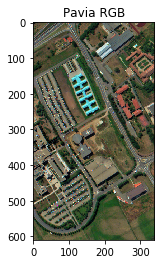

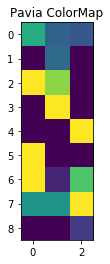

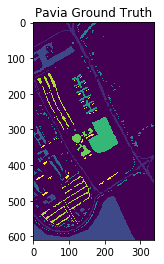

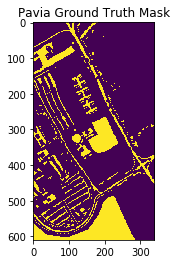

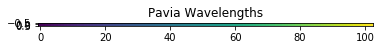

In [9]:
plt.figure(100)
plt.title('Pavia RGB')
plt.imshow(pavia['rgb'])
plt.figure(101)
plt.title('Pavia ColorMap')
plt.imshow(pavia['color_map'])
plt.figure(102)
plt.title('Pavia Ground Truth')
plt.imshow(pavia['ground_truth'])
plt.figure(103)
plt.title('Pavia Ground Truth Mask')
plt.imshow(pavia['ground_truth_mask'])
plt.figure(104)
plt.title('Pavia Wavelengths')
plt.imshow(pavia['wavelengths'])
plt.show()

#### Display Sanbar Images

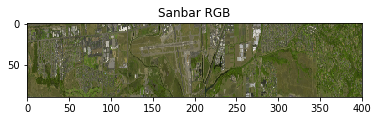

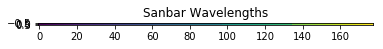

In [10]:
plt.figure(105)
plt.title('Sanbar RGB')
plt.imshow(sanbar['rgb'])
plt.figure(106)
plt.title('Sanbar Wavelengths')
plt.imshow(sanbar['wavelengths'])
plt.show()

### CheckEm

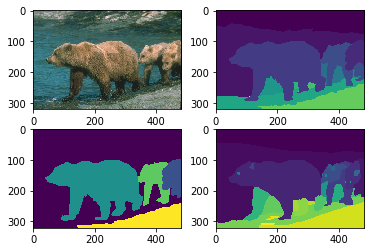

In [11]:
def checkEm():
    for mat_file in glob.glob('ImsAndSegs/*.mat')[0:1]:
        img = scio.loadmat(mat_file)
        plt.figure(mat_file.split(os.sep)[1].replace('.mat',''))
        plt.subplot(2,2,1)
        plt.imshow(img['Im'])
        plt.subplot(2,2,2)
        plt.imshow(img['Seg1'])
        plt.subplot(2,2,3)
        plt.imshow(img['Seg2'])
        plt.subplot(2,2,4)
        plt.imshow(img['Seg3'])
        plt.show()
checkEm()

In [12]:
pavia['rgb'].shape

(610, 340, 3)

ImageView object:
  Display bands       :  [0, 51.5, 102]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

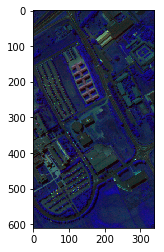

In [13]:
sp.imshow(pavia['hyperimage'])

ImageView object:
  Display bands       :  [0, 89.0, 177]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0023, 0.3823]
    G: [0.004, 0.8536]
    B: [0.0, 0.8914]

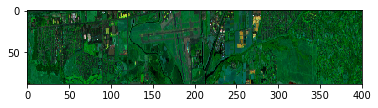

In [14]:
sp.imshow(sanbar['hyperimage'])

## Clustering K Means 

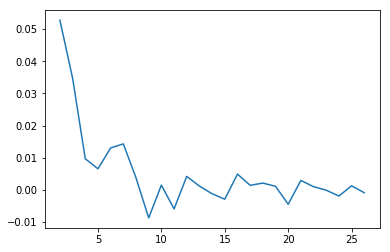

In [109]:
def multi_k_means(inp=pavia['rgb']):
    k = 2
    clust_op = {}
    for i in range(25):
        clust_op[k] = ski.measure.compare_ssim(pavia['ground_truth'].astype(float),
                                               ski.color.rgb2grey(k_means_clustering(inp=inp,n_clusters=k)))
        k += 1
    plt.figure('SSIM Similarity Score between Ground Truth and Clustered Image')
    plt.plot(clust_op.keys(),clust_op.values())
            
multi_k_means()

In [223]:
def k_means_clustering(inp=pavia['rgb'], n_clusters=2):
    if inp is None:
        print("Empty Input. Exiting")
    k_means = KMeans(n_clusters=n_clusters)
    k_means.fit(inp.reshape((-1,1)))
    inp_clustered = k_means.labels_.astype(float)
    inp_clustered.shape = inp.shape
    return inp_clustered 

In [ ]:
plt.figure(12)
plt.subplot(1,4,1)
plt.imshow(pavia['rgb'])
plt.subplot(1,4,2)
plt.imshow(pavia['ground_truth'])
plt.subplot(1,4,3)
clust = k_means_clustering(n_clusters=3)
plt.imshow(ski.color.rgb2grey(clust))
plt.subplot(1,4,4)
plt.imshow(pavia['ground_truth_mask'])
plt.title('Structural Similarity Between Clustered O/P and Ground Truth %r' %
         ski.measure.compare_ssim(pavia['ground_truth'].astype(float), ski.color.rgb2grey(clust)))
plt.show()


## Clustering Fuzzy C Means 

In [ ]:
def fuzzy_c_means(n_centers=2,fuzz_degree=2,error=0.005,max_iter=1000,inp_image=pavia['rgb']):
    centers, u, u0, d, jm, n_iters, fpc = skf.cluster.cmeans(
        inp_image.reshape(-1,1).T,
        c=n_centers,
        m=fuzziness_degree,
        error=error,
        maxiter=max_iter,
        init=None,
        seed=42
    )
    clust = np.argmax(u, axis=0).astype(float)
    clust.shape = inp_image.shape
    return clust

def multi_fuzzy_c_means(n_centers=2,fuzz_degree=2,error=0.005,max_iter=1000,inp_image=pavia['rgb']):
    k = 2 
    clust_op = {}
    for i in range(25):
        clust_op[k] = ski.measure.compare_ssim(pavia['ground_truth'].astype(float),
                                               ski.color.rgb2grey(fuzzy_c_means(
                                                   n_centers=k,fuzz_degree=fuzz_degree,
                                                   error=error,max_iter=max_iter,
                                                   inp_image=inp_image)))
        k += 1
    plt.figure('SSIM Similarity Score between Ground Truth and Clustered Image')
    plt.plot(clust_op.keys(),clust_op.values())
        
        
multi_fuzzy_c_means()      

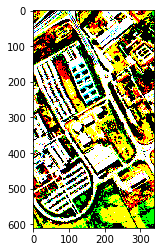

In [219]:

clust.shape = inp_image.shape
plt.imshow(clust)

In [213]:
print(centers.shape)
print(u.shape)
print(inp_image.reshape(-1,1).shape, inp_image.reshape(1,-1).T.shape)

(2, 3)
(2, 207400)
(622200, 1) (622200, 1)


In [ ]:
plt.figure(123)
plt.subplot(1,3,1)
plt.imshow(pavia['rgb'])
plt.subplot(1,3,2)
plt.imshow(pavia['ground_truth'])
plt.subplot(1,3,3)
# clust = k_means_clustering(n_clusters=2)
plt.imshow(ski.color.rgb2grey(clust))
# plt.subplot(1,2,4)
# plt.imshow(pavia['ground_truth_mask'])
plt.title('Structural Similarity Between Clustered O/P and Ground Truth %r' %
         ski.measure.compare_ssim(pavia['ground_truth'].astype(float), ski.color.rgb2grey(clust)))
plt.show()